## GPU can work but cpu can't , I don't know why??????

In [1]:
#http://sdsawtelle.github.io/blog/output/week9-recommender-andrew-ng-machine-learning-with-python.html?fbclid=IwAR3AHrpbxYCKhbGnzOyWHdm3IXppK7qjg73ULwAyQhR5e24_3693xyNqK90
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [2]:
import os
print(os.getcwd())

/Users/YiHsien/Documents/kaggle/AnimeRecommendations


In [3]:
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')

In [4]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
anime_id    12294 non-null int64
name        12294 non-null object
genre       12232 non-null object
type        12269 non-null object
episodes    12294 non-null object
rating      12064 non-null float64
members     12294 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 672.4+ KB


In [6]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [7]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
user_id     int64
anime_id    int64
rating      int64
dtypes: int64(3)
memory usage: 178.8 MB


In [8]:
mergedata = pd.merge(rating,anime,on=['anime_id','anime_id'])
mergedata = mergedata[mergedata['type']=='Movie']
mergedata.head(10)

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
98741,1,442,-1,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Adventure, Comedy, Drama, Historical, Shounen,...",Movie,1,7.17,120571
98742,5,442,4,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Adventure, Comedy, Drama, Historical, Shounen,...",Movie,1,7.17,120571
98743,54,442,-1,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Adventure, Comedy, Drama, Historical, Shounen,...",Movie,1,7.17,120571
98744,99,442,2,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Adventure, Comedy, Drama, Historical, Shounen,...",Movie,1,7.17,120571
98745,128,442,7,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Adventure, Comedy, Drama, Historical, Shounen,...",Movie,1,7.17,120571
98746,129,442,8,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Adventure, Comedy, Drama, Historical, Shounen,...",Movie,1,7.17,120571
98747,171,442,10,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Adventure, Comedy, Drama, Historical, Shounen,...",Movie,1,7.17,120571
98748,188,442,-1,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Adventure, Comedy, Drama, Historical, Shounen,...",Movie,1,7.17,120571
98749,190,442,5,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Adventure, Comedy, Drama, Historical, Shounen,...",Movie,1,7.17,120571
98750,201,442,10,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Adventure, Comedy, Drama, Historical, Shounen,...",Movie,1,7.17,120571


In [9]:
mergedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1051998 entries, 98741 to 7813726
Data columns (total 9 columns):
user_id     1051998 non-null int64
anime_id    1051998 non-null int64
rating_x    1051998 non-null int64
name        1051998 non-null object
genre       1051911 non-null object
type        1051998 non-null object
episodes    1051998 non-null object
rating_y    1051996 non-null float64
members     1051998 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 80.3+ MB


In [10]:
mergedata['genre'].fillna('None', inplace=True)

In [11]:
mergedata['rating_y'].fillna(mergedata['rating_y'].median(), inplace=True)

## train and test

In [12]:
import random
random.seed(39987)

In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(mergedata, test_size=0.3)

In [14]:
print(train.shape,test.shape)

(736398, 9) (315600, 9)


## 將電影類別換成數字

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin
class CounterEncoder(BaseEstimator, TransformerMixin):
    """依照出現頻率進行編碼, 頻率由高到低的index = 0, 1, 2, 3 ..., 以此類推"""
    def fit(self, y):
        counter = pd.Series(y).value_counts()
        self.enc = dict(zip([None] + counter.index.tolist(), range(len(counter) + 1)))
        self.invEnc = dict(zip(self.enc.values(), self.enc.keys()))
        self.classes_ = counter.index.values
        return self

    def transform(self, y):
        return pd.Series(y).map(self.enc).fillna(0).values

    def fit_transform(self, y, **fit_params):
        return self.fit(y).transform(y)
    
    def inverse_transform(self, y):
        return pd.Series(y).map(self.invEnc).values


class OrderedMapper(CounterEncoder):
    def fit(self, y):
        uniq = pd.Series(y).unique()
        self.enc = dict(zip(uniq, range(len(uniq))))
        self.invEnc = dict(zip(range(len(uniq)), uniq))
        self.classes_ = uniq
        return self

In [16]:
from collections import defaultdict, Counter, OrderedDict
def doMovies(movies):
    """處理 movie: genres 轉換成數字"""
    movies = movies.reset_index(drop=True)
    movies.loc[movies.genre == "(no genres listed)", "genre"] = ""
    movies['genre']=movies['genre'].fillna('')
    movies["genre"] = movies.genre.str.split(",")
    genreMap = Counter()
    movies.genre.map(genreMap.update)
    om = OrderedMapper().fit([e[0] for e in genreMap.most_common()])
    movies["genre"] = movies.genre.map(lambda lst: [om.enc[e] for e in lst])
    return movies, om

In [17]:
movie_trans, genres_enc = doMovies(anime)

In [18]:
from sklearn.preprocessing import minmax_scale
movie_trans["members"] = minmax_scale(movie_trans.members.fillna(movie_trans.members.median()))
movie_trans.head()

/Users/YiHsien/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"[13, 7, 9, 12]",Movie,1,9.37,0.197872
1,5114,Fullmetal Alchemist: Brotherhood,"[1, 15, 11, 3, 17, 27, 4]",TV,64,9.26,0.782770
2,28977,Gintama°,"[1, 6, 18, 30, 41, 2, 4]",TV,51,9.25,0.112689
3,9253,Steins;Gate,"[49, 47]",TV,24,9.17,0.664325
4,9969,Gintama&#039;,"[1, 6, 18, 30, 41, 2, 4]",TV,51,9.16,0.149186


## 重寫user anime id

In [19]:
u = pd.DataFrame()
u['user_id'] = mergedata['user_id'].unique()
u['user'] = range(0,len(mergedata['user_id'].unique()))
m = pd.DataFrame()
m['anime_id'] = mergedata['anime_id'].unique()
m['movie'] = range(0,len(mergedata['anime_id'].unique()))

In [20]:
train = pd.merge(train,u,on=['user_id'])
train = pd.merge(train,m,on=['anime_id'])
test = pd.merge(test,u,on=['user_id'])
test = pd.merge(test,m,on=['anime_id'])

In [21]:
train.drop(['user_id','anime_id'], axis=1, inplace=True)
test.drop(['user_id','anime_id'], axis=1, inplace=True)

In [22]:
train.rename(columns={'user':'user_id','movie':'anime_id'}, inplace=True)
test.rename(columns={'user':'user_id','movie':'anime_id'}, inplace=True)

In [23]:
movie_trans = pd.merge(movie_trans,m,on=['anime_id'])
movie_trans.drop(['anime_id'], axis=1, inplace=True)
movie_trans.rename(columns={'movie':'anime_id'}, inplace=True)

In [24]:
movie_trans.head()

,name,genre,type,episodes,rating,members,anime_id
0,Kimi no Na wa.,"[13, 7, 9, 12]",Movie,1,9.37,0.197872,297
1,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"[1, 6, 18, 30, 41, 2, 4]",Movie,1,9.10,0.071534,54
2,Koe no Katachi,"[13, 9, 4]",Movie,1,9.05,0.101318,881
3,Sen to Chihiro no Kamikakushi,"[5, 11, 12]",Movie,1,8.93,0.459852,5
4,Ookami Kodomo no Ame to Yuki,"[23, 10]",Movie,1,8.84,0.223084,107


## leave on out

In [25]:
#拿掉無評分的資料
train = train[train['rating_x']!=-1]
test = test[test['rating_x']!=-1]
print(train.shape,test.shape)

(589243, 9) (252910, 9)


In [26]:
#train1 = pd.merge(train[['user_id','anime_id','rating_x']],movie_trans[['anime_id','genre','rating','members']], how="left", on="anime_id")
#test1 = pd.merge(test[['user_id','anime_id','rating_x']],movie_trans[['anime_id','genre','rating','members']], how="left", on="anime_id")

In [27]:
def loo_preprocess(data, movie_trans, train_hist=None, is_train=True):
    """以leave one out方式產生 train data, test data"""
    queue = []
    data = pd.merge(data[['user_id','anime_id','rating_x']],movie_trans[['anime_id','genre','rating','members']], how="left", on="anime_id")
    columns=["user_id", "anime_id", "genre", "rating","members", "candidate_movie_id","rating_x"]
    for u, df in data.groupby("user_id"):
        df = df.sort_values("rating_x", ascending=False)
        if not is_train:
            user_movies_hist = train_hist.query("user_id == {}".format(u)).anime_id
        for i, (_, r) in enumerate(df.iterrows()):
            if is_train:
                queue.append([int(r.user_id),
                              df.anime_id[:i].tolist() + df.anime_id[i + 1:].tolist(),
                              r.genre, r.rating, r.members, int(r.anime_id), r.rating_x])
            else:
                # queue.append([int(r.userId), df.movieId[:i].tolist() + df.movieId[i + 1:].tolist(), r.genres, r.avg_rating, r.year, int(r.movieId), r.rating])
                # all_hist = set(user_movies_hist.tolist() + df.movieId[:i].tolist())
                all_hist = set(user_movies_hist.tolist())
                queue.append([int(r.user_id),
                              list(all_hist - set([int(r.anime_id)])),
                              r.genre, r.rating, r.members, int(r.anime_id), r.rating_x])
    return pd.DataFrame(queue, columns=columns)

In [28]:
trProcessed = loo_preprocess(train, movie_trans)
teProcessed = loo_preprocess(test, movie_trans)

In [29]:
trProcessed.head()

,user_id,anime_id,genre,rating,members,candidate_movie_id,rating_x
0,1,"[50, 38, 55, 26, 5, 24, 11, 36, 37, 52, 46, 51...","[1, 6, 18, 30, 41, 2, 4]",9.10,0.071534,54,10
1,1,"[54, 38, 55, 26, 5, 24, 11, 36, 37, 52, 46, 51...","[49, 47]",8.61,0.189779,50,9
2,1,"[54, 50, 55, 26, 5, 24, 11, 36, 37, 52, 46, 51...","[1, 15, 18, 41]",8.43,0.123776,38,9
3,1,"[54, 50, 38, 26, 5, 24, 11, 36, 37, 52, 46, 51...","[0, 21, 10]",7.97,0.030386,55,8
4,1,"[54, 50, 38, 55, 5, 24, 11, 36, 37, 52, 46, 51...","[1, 15, 32, 27, 2, 12]",8.15,0.212930,26,8


In [30]:
trProcessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589243 entries, 0 to 589242
Data columns (total 7 columns):
user_id               589243 non-null int64
anime_id              589243 non-null object
genre                 589243 non-null object
rating                589242 non-null float64
members               589243 non-null float64
candidate_movie_id    589243 non-null int64
rating_x              589243 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 31.5+ MB


In [31]:
teProcessed.head()

,user_id,anime_id,genre,rating,members,candidate_movie_id,rating_x
0,1,"[40, 28, 53, 34, 41, 12, 47, 31, 48, 56, 32, 2]","[5, 11, 7, 2]",8.44,0.285233,35,8
1,1,"[35, 28, 53, 34, 41, 12, 47, 31, 48, 56, 32, 2]","[5, 6, 11, 25, 9, 21]",7.87,0.023940,40,8
2,1,"[35, 40, 53, 34, 41, 12, 47, 31, 48, 56, 32, 2]","[1, 15, 6, 11, 3, 8]",7.66,0.098711,28,7
3,1,"[35, 40, 28, 34, 41, 12, 47, 31, 48, 56, 32, 2]","[13, 10, 12]",8.19,0.093929,53,7
4,1,"[35, 40, 28, 53, 41, 12, 47, 31, 48, 56, 32, 2]","[5, 6, 11, 3, 8]",7.46,0.077789,34,7


In [32]:
teProcessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252910 entries, 0 to 252909
Data columns (total 7 columns):
user_id               252910 non-null int64
anime_id              252910 non-null object
genre                 252910 non-null object
rating                252910 non-null float64
members               252910 non-null float64
candidate_movie_id    252910 non-null int64
rating_x              252910 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 13.5+ MB


In [33]:
print(train.shape,test.shape)

(589243, 9) (252910, 9)


## Data Function
-由於tensorflow placeholder不支援變動長度的columns, 需透過padding zero(補零)帶入

-每個變動長度的column, 需要再給lens描述每一筆資料的長度, ex: genres, genres_len

In [34]:
import tensorflow as tf
def do_multi(df, multi_cols):
    """對於multivalent的欄位, 需要增加一個column去描述該欄位的長度"""
    pad = tf.keras.preprocessing.sequence.pad_sequences
    ret = OrderedDict()
    for colname, col in df.iteritems():
        if colname in multi_cols:
            lens = col.map(len)
            ret[colname] = list(pad(col, padding="post", maxlen=lens.max()))
            ret[colname + "_len"] = lens.values
        else:
            ret[colname] = col.values
    return ret
def get_minibatches_idx(n, batch_size, shuffle=False):
    idx_list = np.arange(n, dtype="int32")
    if shuffle:
        np.random.shuffle(idx_list)
    minibatches = []
    minibatch_start = 0
    for i in range(n // batch_size):
        minibatches.append(idx_list[minibatch_start : minibatch_start + batch_size])
        minibatch_start += batch_size

    if (minibatch_start != n):
        # Make a minibatch out of what is left
        minibatches.append(idx_list[minibatch_start:])
    return minibatches
def dataFn(data, n_batch=128, shuffle=False):
    def fn():
        dataInner = data.copy()
        indices = get_minibatches_idx(len(dataInner), n_batch, shuffle=shuffle)
        for ind in indices:
            yield do_multi(dataInner.iloc[ind], ["anime_id", "genre"])
    return fn

for i, e in enumerate(dataFn(trProcessed, n_batch=len(trProcessed), shuffle=True)(), 1):
    # print(e)
    break
trProcessed = pd.DataFrame(e)

for i, e in enumerate(dataFn(teProcessed, n_batch=len(teProcessed), shuffle=True)(), 1):
    # print(e)
    break
teProcessed = pd.DataFrame(e)

/Users/YiHsien/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [35]:
import keras
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [36]:
n_users, n_movies = len(mergedata['user_id'].unique()),len(mergedata['anime_id'].unique())

In [37]:
n_latent_factors_user = 3
n_latent_factors_movie = 3


movie_input = keras.layers.Input(shape=[1],name='Item')
movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors_movie, name='Movie-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)
movie_vec = keras.layers.Dropout(0.2)(movie_vec)

movie_hist_input = keras.layers.Input(shape=[4],name='Item_hist')
movie_hist_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors_movie, name='Movie-Embedding_hist')(movie_hist_input)
movie_hist_vec = keras.layers.Flatten(name='FlattenMovies_hist')(movie_hist_embedding)
movie_hist_vec = keras.layers.Dropout(0.2)(movie_hist_vec)


user_input = keras.layers.Input(shape=[1],name='User')
user_embedding = keras.layers.Embedding(n_users + 1, n_latent_factors_user,name='User-Embedding')(user_input)
user_vec = keras.layers.Flatten(name='FlattenUsers')(user_embedding)
user_vec = keras.layers.Dropout(0.2)(user_vec)

user_hist_input = keras.layers.Input(shape=[2],name='User_hist')
user_hist_embedding = keras.layers.Embedding(n_users + 1, n_latent_factors_user,name='User-Embedding_hist')(user_hist_input)
user_hist_vec = keras.layers.Flatten(name='FlattenUsers_hist')(user_hist_embedding)
user_hist_vec = keras.layers.Dropout(0.2)(user_hist_vec)

#concat = keras.layers.concatenate([movie_vec, user_vec],name='Concat')
concat = keras.layers.concatenate([movie_vec, user_vec,user_hist_vec,movie_hist_vec],name='Concat')



concat_dropout = keras.layers.Dropout(0.2)(concat)
dense = keras.layers.Dense(200,name='FullyConnected', activation='relu')(concat)
dropout_1 = keras.layers.Dropout(0.2,name='Dropout')(dense)
dense_2 = keras.layers.Dense(100,name='FullyConnected-1', activation='relu')(concat)
dropout_2 = keras.layers.Dropout(0.2,name='Dropout')(dense_2)
dense_3 = keras.layers.Dense(50,name='FullyConnected-2', activation='relu')(dense_2)
dropout_3 = keras.layers.Dropout(0.2,name='Dropout')(dense_3)
dense_4 = keras.layers.Dense(20,name='FullyConnected-3', activation='relu')(dense_3)


result = keras.layers.Dense(1, activation='relu',name='Activation')(dense_4)
adam = Adam(lr=0.005)

#model = keras.Model([user_input, movie_input], result)
model = keras.Model([user_input, movie_input,user_hist_input,movie_hist_input], result)



model.compile(optimizer=adam,loss= 'mean_absolute_error')

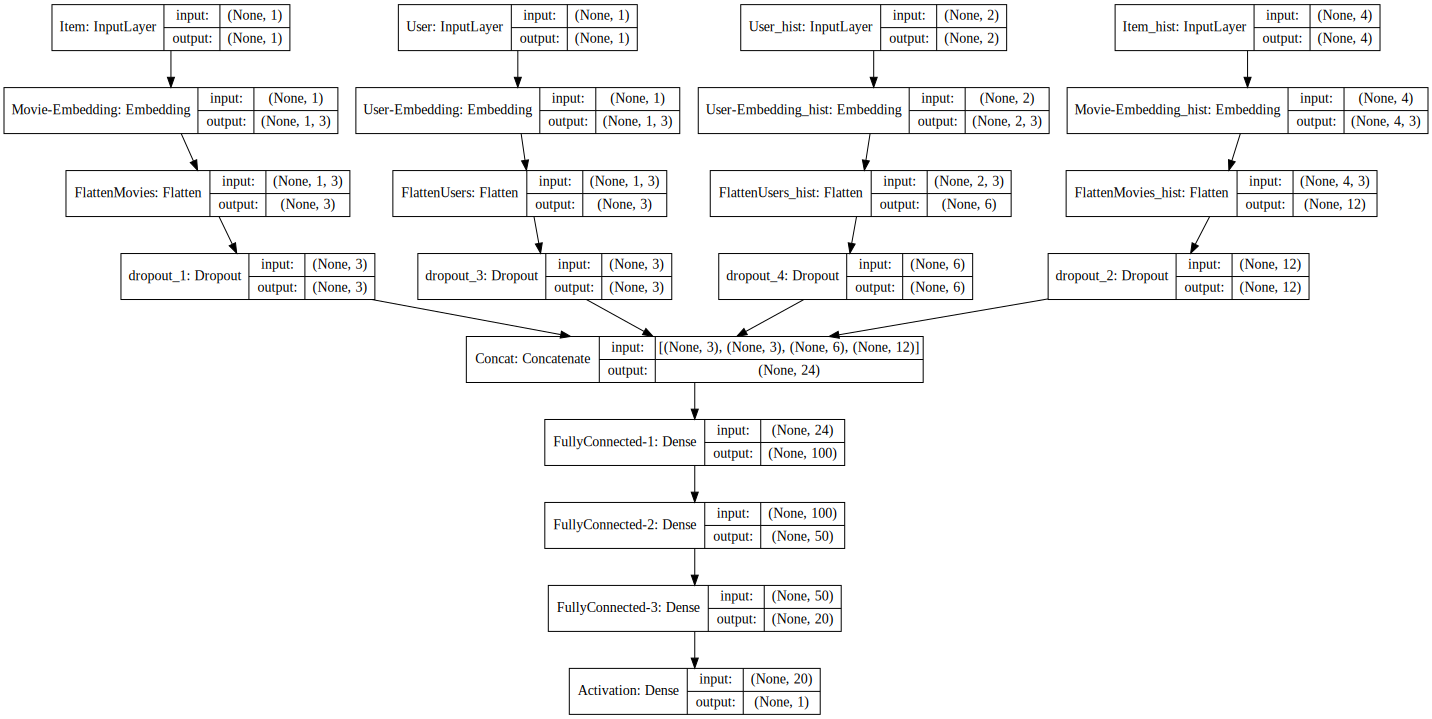

In [38]:
SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [39]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
User_hist (InputLayer)          (None, 2)            0                                            
__________________________________________________________________________________________________
Item_hist (InputLayer)          (None, 4)            0                                            
__________________________________________________________________________________________________
Movie-Embe

In [40]:
trProcessed.head()

,user_id,anime_id,anime_id_len,genre,genre_len,rating,members,candidate_movie_id,rating_x
0,292,"[49, 39, 258, 2, 47, 0, 0, 0, 0, 0, 0, 0, 0, 0...",5,"[5, 6, 11, 18, 4, 12, 0, 0, 0]",6,7.17,0.118912,0,10
1,33722,"[126, 26, 28, 205, 112, 182, 68, 69, 213, 158,...",17,"[50, 12, 0, 0, 0, 0, 0, 0, 0]",2,7.74,0.023015,128,8
2,27492,"[119, 115, 152, 126, 153, 60, 11, 63, 207, 51,...",25,"[1, 15, 6, 11, 3, 8, 0, 0, 0]",6,7.66,0.098711,28,6
3,8232,"[63, 97, 26, 22, 83, 58, 94, 140, 79, 24, 81, ...",24,"[5, 6, 3, 2, 4, 0, 0, 0, 0]",5,6.93,0.056827,195,7
4,14332,"[100, 96, 81, 26, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",4,"[5, 11, 12, 0, 0, 0, 0, 0, 0]",3,8.93,0.459852,5,8


In [41]:
trProcessed2=trProcessed

In [44]:
#有問題的資料
trProcessed2 = trProcessed2.drop(trProcessed2.index[420000:430000])

In [45]:
#train
u_id = trProcessed2['user_id'].values
m_id = trProcessed2['candidate_movie_id'].values
u_hist = trProcessed2[['user_id','anime_id_len']]
#u_hist = trProcessed2[['user_id','anime_id','anime_id_len']].values
m_hist = trProcessed2[['candidate_movie_id','genre_len','rating','members']]
#m_hist = trProcessed2[['candidate_movie_id','genre','genre_len','rating','members']].values
t_y = trProcessed2['rating_x'].values
#test
u_id2 = teProcessed['user_id'].values
m_id2 = teProcessed['candidate_movie_id'].values
u_hist2 = teProcessed[['user_id','anime_id_len']]
#u_hist2 = teProcessed[['user_id','anime_id','anime_id_len']].values
m_hist2 = teProcessed[['candidate_movie_id','genre_len','rating','members']]
#m_hist2 = teProcessed[['candidate_movie_id','genre','genre_len','rating','members']].values
e_y = teProcessed['rating_x'].values

In [48]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

history_2 = model.fit([u_id,m_id,u_hist,m_hist], t_y, epochs=100,batch_size=128,
                      validation_data = ([u_id2,m_id2,u_hist2,m_hist2],e_y), callbacks=[early_stopping])

Train on 579243 samples, validate on 252910 samples
Epoch 1/100
188672/579243 [========>.....................] - ETA: 17s - loss: 0.9026

InvalidArgumentError: indices[73,2] = -2147483648 is not in [0, 2143)
	 [[{{node Movie-Embedding_hist/embedding_lookup}} = GatherV2[Taxis=DT_INT32, Tindices=DT_INT32, Tparams=DT_FLOAT, _class=["loc:@training/Adam/Assign_11"], _device="/job:localhost/replica:0/task:0/device:CPU:0"](Movie-Embedding_hist/embeddings/read, Movie-Embedding_hist/Cast, Movie-Embedding_hist/embedding_lookup/axis)]]

In [123]:
type(teProcessed)

pandas.core.frame.DataFrame

In [55]:
from keras.models import load_model
model = load_model('history_2.h5')

In [50]:
alldata=pd.concat([trProcessed2,teProcessed])

In [51]:
v1 = alldata['user_id'].values
v2 = alldata['candidate_movie_id'].values
v3 = alldata[['user_id','anime_id_len']]
v4 = alldata[['candidate_movie_id','genre_len','rating','members']]



In [52]:
y_true = alldata['rating_x']

In [56]:
y_hat= np.round(model.predict([v1,v2,v3,v4]),0)


InvalidArgumentError: indices[23,2] = -2147483648 is not in [0, 2143)
	 [[{{node Movie-Embedding_hist_2/embedding_lookup}} = GatherV2[Taxis=DT_INT32, Tindices=DT_INT32, Tparams=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Movie-Embedding_hist_2/embeddings/read, Movie-Embedding_hist_2/Cast, Movie-Embedding_hist_2/embedding_lookup/axis)]]

In [ ]:
#print(sum((y_true - y_hat)**2))

In [ ]:
alldata['y_hat'] = y_hat